# Principal Component Analysis
PCA is fundamentally a dimensionality reduction algorithm, but it can also be useful as a tool for visualization, for noise filtering, for feature extraction and engineering, and much more. After a brief conceptual discussion of the PCA algorithm, we will see a couple examples of these further applications.

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

Principal component analysis is a fast and flexible unsupervised method for dimensionality reduction in data. Its behavior is easiest to visualize by looking at a two-dimensional dataset. The following code generates points which are a linear combination of two vectors (chosen randomly). If you remember from linear algebra, that would be a change of base.

In [3]:
np.random.seed(1)
X = np.dot(np.random.rand(2, 2), np.random.randn(2, 200)).T

Plot the points as a scatter plot, set `plt.axis('equal')` to have the two axis at the same scale

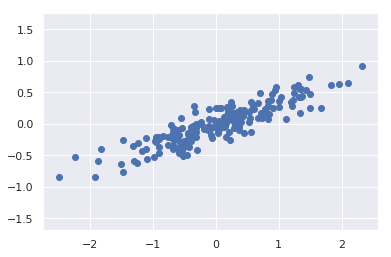

In [4]:
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

What would you say if you had two features in your dataset that had this relationship? When performing dimensionality reduction we want to go from a higher dimensional space of $m$ dimensions to a smaller one of $k$ dimensions. In this particular case, $m=2$ and $k=1$ due to our inability to generate plots with high dimensional data. Usually though, $m \approx 1000$ and $k \approx 100$. In the case of 2D -> 1D, this might look very similar to linear regression, where we try to predict one variable as a function of the other, but the background problem is completely different. The dimensionality reduction problem attempts to learn about the relationship between the two variables. In principal component analysis, this relationship is quantified by finding a list of the principal axes in the data, that is the axes across which we see a larger variability in the data, and using those axes to describe the dataset. Now use sklearn's PCA method with `n_components=2` and fit it to the data we just generated.

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

During the fit, the PCA object learns some quantities from the data, most importantly the "components" and "explained variance". Print the components, what can you say about them? do you know which are the main directions of variability of the data? Does this coincide with the results?

In [6]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


Now print the explained variance. What does this mean? How come the first number is much larger than the second?

In [7]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


This code will plot the principal component vectors proportional to the sqrt of the explained variance. 

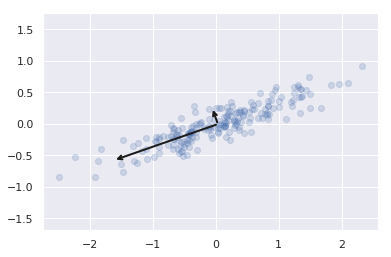

In [8]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2, color='k')
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 2 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

Now, let us generate points within a circle, you can generate random angles between $0$ and $2\pi$ and random radius between $0$ and $R$. Then generate x and y coordinates as:

$$ x = R\ cos(\alpha)$$
$$ y = R\ sin(\alpha)$$

Generate 200 points.

Make a scatter plot of the generated data, would it be a good idea to perform a PCA on this dataset? Why?

Perform a PCA to the data, again with 2 components. Print the components and the explained variance. What can you tell about the results? 

Plot again the data with the principal components

## PCA as dimensionality reduction
Using PCA for dimensionality reduction involves removing one or more of the smallest principal components, resulting in a lower-dimensional projection of the data that preserves the maximal data variance.

Generate again the points with high linear correlation.

Now call again the PCA object with `n_components=1` and fit it to the data. 

In order to reduce the dimensions, we can generate a new X with the projected points into the principal components. You may do that with `pca.transform(X)`. Print the shapes of the original X and the transformed X.

The transformed data has been reduced to a single dimension. To understand the effect of this dimensionality reduction, we can perform the inverse transform of this reduced data and plot it along with the original data. You may do that with `pca.inverse_transform`. Generate a scatter plot of the original points and the projected points.

The fraction of variance that is cut out (proportional to the spread of points along the line formed in this figure) is roughly a measure of how much "information" is discarded in this reduction of dimensionality.

This reduced-dimension dataset is in some senses "good enough" to encode the most important relationships between the points: despite reducing the dimension of the data by 50%, the overall relationship between the data points are mostly preserved.

## PCA as feature selector

PCA can be used as a feature selector for datasets which have a large amount of features, possibly correlated. Images is an example where this happens often. Here we will take a look and explore a bit into that. We will be using the Labeled Faces in the Wild dataset made available through Scikit-Learn.

In [ ]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)

Print the target names

Print the shape of the images, how many dimensions does each example have?

Print the dataset description

Print the shape of the data. Is this in accordance with the shape of the images?

Create a subplot with 3 rows and 5 columns, each plot should be an image that can be plotted with `axis.imshow()` and the title of the plots should be the target name.

Let's take a look at the principal axes that span this dataset. Because this is a large dataset, we will use PCA with the `svd_solver=randomized`. It will use a randomized method to approximate the first $N$ principal components much more quickly than the standard PCA estimator, and thus is very useful for high-dimensional data (here, a dimensionality of nearly 3,000). Generate a PCA estimator with 150 components and fit it to the data. Use the library `time` to compute the number of seconds it needs to generate the 150 components and print the principal components.

Now use the full svd method. Also print the components and compare them with the previous ones. Are the results compatible?

In this case, it can be interesting to visualize the images associated with the first several principal components (these components are technically known as "eigenvectors," so these types of images are often called "eigenfaces"). Generate a subplot with 3 rows and 8 columns, might be better for visualization to set `figsize=(16, 8)`. For each subplot, show the image corresponding to the the ith principal component, reshaped to have the same dimensions as the input images.

The results are very interesting, and give us insight into how the images vary: for example, the first few eigenfaces (from the top left) seem to be associated with the angle of lighting on the face, and later principal vectors seem to be picking out certain features, such as eyes, noses, and lips. Let's take a look at the cumulative variance of these components to see how much of the data information the projection is preserving. You may compute the cumulative sum of the `explained_variance_ratio_` with `np.cumsum`. Make a plot of the curve. Do you think 150 components is enough? What do you think that might be a good criteria to stop? You may try to repeat the plot increasing the number of components.

## PCA for data compression

We see that these 150 components account for more than 90% of the variance. That would lead us to believe that using these 150 components, we would recover most of the essential characteristics of the data. To make this more intuitive, we can compare the input images with the images reconstructed from these 150 components. First project the original images to the principal components. You may do this with the `transform` method of the pca. Print the shape of the projected images.

Print the size in MB of the original data and the projected data. To what is due the difference in size?

Now let us plot the reprojection of the data into its original space. You can recover the projection with `inverse_transform`.

Generate a subplot with 2 rows and 10 columns, might be better for visualization to set `figsize=(15, 4)`. For each column, show the image corresponding to the the ith original image on top. Below, show the reprojection of that same image after applying PCA reshaped to have the same dimensions as the input images. What are your conlusions after this plot?